# Analyzing Police Activity Dataset
Exploring the Stanford Open Policing Project dataset and analyzing the impact of gender on police behavior.

## Preparing and Cleaning Data

### Inpect data and look at missing values

In [87]:
import pandas as pd

#Read Data
ts = pd.read_csv("datasets\police_traffic_stops.csv")
display(ts.head())

#Dataframe Info
display(ts.info())


#Look for missing values
display(ts.isnull().sum())
display(ts.shape)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

None

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

(91741, 15)


### Drop rows/columns

  1. Drop county_name column as all values in the column are NaN. Drop State column as data is for a single state.
  2. Drop rows without stop date and stop time column

In [88]:
# Drop state and county_name
display(ts['state'].value_counts())
ts.drop(['county_name','state'], axis='columns', inplace=True)

#Drop rows with NaN stop_date and stop_time
ts.dropna(subset=['stop_date', 'stop_time'], inplace=True)

display(ts.shape)

RI    91741
Name: state, dtype: int64

(91741, 13)

### Using proper data types
1. Change is_arrested to boolean
2. Combine stop_date and stop_time columns to create pandas datetime object and set it as index of data frame

In [89]:
#Look at column data types
display(ts.dtypes)

#Change is_arrested to boolean
display(ts['is_arrested'].value_counts())
ts['is_arrested'] = ts['is_arrested'].astype('bool')

#Combine stop date and stop time to create pandas date time object
ts['stop_datetime'] = pd.to_datetime(ts['stop_date'].str.cat(ts['stop_time'], sep=" "))

display(ts.dtypes)

#Set datetime as index of dataframe
ts.set_index('stop_datetime', inplace=True)

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

False    83461
True      3078
Name: is_arrested, dtype: int64

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

## Exploring Relationship between Gender and Policing

### Examine Traffic Violations  and Comparing Violations by Gender

In [90]:
#Examine Traffic Violations
display(ts['violation'].value_counts(normalize=True))

#Compare Violations by gender
female = ts[ts['driver_gender']=='F']
male = ts[ts['driver_gender']=='M']

display(female['violation'].value_counts(normalize=True))
display(male['violation'].value_counts(normalize=True))

#Single line
display(ts.groupby('driver_gender')['violation'].value_counts(normalize=True))

Speeding               0.559563
Moving violation       0.187476
Equipment              0.126209
Other                  0.050960
Registration/plates    0.042790
Seat belt              0.033002
Name: violation, dtype: float64

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64

driver_gender  violation          
F              Speeding               0.658114
               Moving violation       0.138218
               Equipment              0.105199
               Registration/plates    0.044418
               Other                  0.029738
               Seat belt              0.024312
M              Speeding               0.522243
               Moving violation       0.206144
               Equipment              0.134158
               Other                  0.058985
               Registration/plates    0.042175
               Seat belt              0.036296
Name: violation, dtype: float64

### Effect of Gender on Speeding Tickets

In [91]:
# Compare data by gender for speeding violation
female_speeding  = ts[(ts['driver_gender']=='F') & (ts['violation']=='Speeding')]
male_speeding  = ts[(ts['driver_gender']=='M') & (ts['violation']=='Speeding')]

display(female_speeding['stop_outcome'].value_counts(normalize=True))
display(male_speeding['stop_outcome'].value_counts(normalize=True))

#Single Line
ts[ts['violation']=='Speeding'].groupby('driver_gender')['stop_outcome'].value_counts(normalize=True)

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64

driver_gender  stop_outcome    
F              Citation            0.952192
               Warning             0.040074
               Arrest Driver       0.005752
               N/D                 0.000959
               Arrest Passenger    0.000639
               No Action           0.000383
M              Citation            0.944595
               Warning             0.036184
               Arrest Driver       0.015895
               Arrest Passenger    0.001281
               No Action           0.001068
               N/D                 0.000976
Name: stop_outcome, dtype: float64

### Effect of Gender on Vehicle Search

In [92]:
# Compare data by gender on Vehicle Search
ts.groupby(['driver_gender'])['search_conducted'].mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

It  seems that search rate for males is much higher than females. Search rate might depend on violation type as well.

In [93]:
# Compare search rate by gender and violation
ts.groupby(['violation','driver_gender'])['search_conducted'].mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


### Effect of  Gender on Frisking

In [94]:
# Use search type to look at rows with 'Protective Frisk'
display(ts['search_type'].value_counts())

# Since search type can have multiple values, containment need to be checked
ts['frisk'] = ts['search_type'].str.contains('Protective Frisk', na=False)

# Frisk condcuted by gender when vehicle was searched
display(ts[(ts['search_conducted'])].groupby('driver_gender')['frisk'].mean())


Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


## Visualizing Exploratory Data Analysis

### Does time of day affect arrest rate ?
Plot hourly arrrest rate and compare with overall rate.

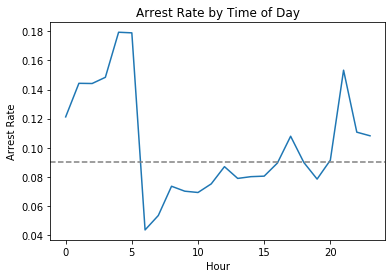

In [95]:
# Overall Arrest Rate
overall_arrest_rate = ts['is_arrested'].mean()

#Calculate hourly Arrest Rate. Resampling can also be used (used in next example)
hourly_arrest_rate = ts.groupby(ts.index.hour)['is_arrested'].mean()

# Plot Hourly Arrest Rate on a line chart
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
plt.plot(hourly_arrest_rate)

# Add the xlabel, ylabel, and title
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")

# Add reference line for overall Arrest Rate
plt.axhline(y=overall_arrest_rate, color='gray', linestyle='--')

# Display the plot
plt.show()

The arrest rate has a significant spike overnight, and then dips in the early morning hours.


### Are drug related stops on the rise ?
Visulalize Annual Search Rate and Drug Related Stops to see the trend over time.

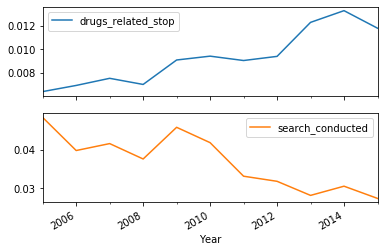

In [96]:
# Calculate annual trend by resampling data and plot line charts
annual_trend = ts.resample('A')[['drugs_related_stop','search_conducted']].mean()
annual_trend.plot(subplots=True)
plt.xlabel("Year")
plt.show()

The rate of drug-related stops increased even though the search rate decreased.


### What violations are caught in each district ?
Plot Violations by District

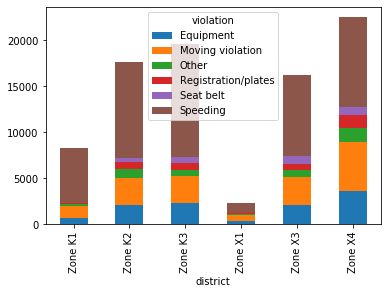

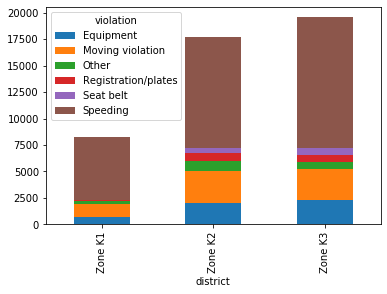

In [97]:
# Create a crosstab and display a bar chart for each district
violations_by_zone =  pd.crosstab(ts['district'], ts['violation'])
violations_by_zone.plot(kind="bar",  stacked=True)
plt.show()

#Plot  only  for  K Zones
k_zones = violations_by_zone.loc['Zone  K1':'Zone K3']
k_zones.plot(kind="bar",  stacked=True)
plt.show()


###  How  long  is a stop for a violation ?

array(['0-15 Min', '16-30 Min', nan, '30+ Min'], dtype=object)

array([ 8., 23., nan, 45.])

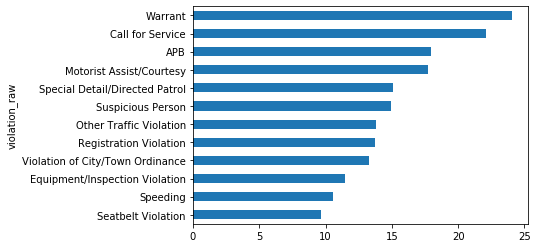

In [98]:
# Print the unique values in 'stop_duration'
display(ts.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45} 

# Convert the 'stop_duration' strings to integers using the 'mapping'
ts['stop_minutes'] = ts.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
display(ts['stop_minutes'].unique())

# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
stop_length = ts.groupby('violation_raw')['stop_minutes'].mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()


## Analyzing effect of weather on policing
Combbining weather dataset with policing dataset to explore the impact of weather conditions on police behavior during traffic stops.

### Exploring weather dataset

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


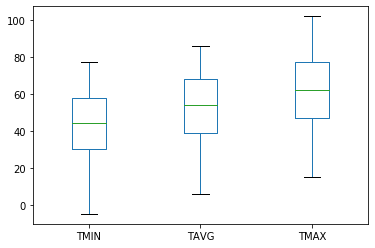

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


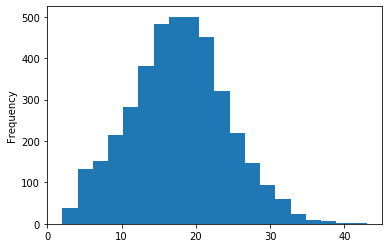

In [99]:
# Read weather dataset
weather = pd.read_csv("datasets/weather_data.csv")
display(weather.head())

# Examine temperature columns for sanity: TMIN, TAVG, TMAX
display(weather[['TMIN','TAVG','TMAX']].describe())

# Visually examine with box plot
weather[['TMIN','TAVG','TMAX']].plot(kind="box")
plt.show()

# Ensure TMIN is always less than TMAX
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather['TDIFF'].plot(kind='hist', bins=20)
plt.show()


### Categorizing the weather
Create ordered category field for weather condition by counting bad weather conditions

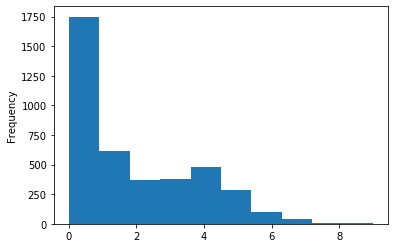

In [100]:
# Copy 'WT01' through 'WT22' to a new DataFrame. Each column is a flag indicating bad weather
WT = weather.loc[:,'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind='hist')

# Display the plot
plt.show()

It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

Categorize the weather based on number of bad conditions. Create an ordered categorical variable for weather rating.

In [101]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather['bad_conditions'].value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather['bad_conditions'].map(mapping)

# Count the unique values in 'rating'
print(weather['rating'].value_counts().sort_index())

# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
weather['rating'] = weather['rating'].astype(pd.api.types.CategoricalDtype(categories = cats))

# Examine the head of 'rating'
print(weather['rating'].head())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64
0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good, bad, worse]



### Merging Policing and Weather data
Merge the 2 datasets on date for analysis

In [102]:
# Reset the index of Policing dataset
ts.reset_index(inplace=True)
display(ts.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]
display(weather_rating.head())

#Merge the datasets
ts_weather = pd.merge(left=ts, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')
display(ts_weather.head())

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8.0
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8.0
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8.0
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23.0
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8.0


,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes,DATE,rating
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8.0,2005-01-04,bad
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8.0,2005-01-23,worse
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8.0,2005-02-17,good
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23.0,2005-02-20,bad
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8.0,2005-02-24,bad



### Does weather affect the arrest rate ?

In [103]:
# Overall Arrest Rate
overall_arrest_rate = ts_weather['is_arrested'].mean()
display(overall_arrest_rate)

# Arrest Rate by weather rating
weather_arrest_rate = ts_weather.groupby('rating')['is_arrested'].mean()
display(weather_arrest_rate)

# Arrest Rate by Violation and weather rating
weather_violation_arrest_rate = ts_weather.pivot_table(index='violation', columns='rating', values='is_arrested')
display(weather_violation_arrest_rate)

0.09025408486936048

rating
good     0.086842
bad      0.090479
worse    0.106527
Name: is_arrested, dtype: float64

rating,good,bad,worse
violation,,,
Equipment,0.058995,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076923,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013404,0.013314,0.016886


The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result